In [0]:
from tabulate import tabulate
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from gensim.models.word2vec import Word2Vec
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import *
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
path = "/content/gdrive/My Drive/Tip_Travel_BinhThuan/"
fn_path = path + "new_final_text.csv"
df = pd.read_csv(fn_path)
df = df[['new_feature','Category']]
cates = df.groupby('Category')
print("total categories:", cates.ngroups)
print(cates.size())

total categories: 28
Category
am-thuc               1341
bat-dong-san          2328
cong-nghe             3311
du-lich               2001
game                   165
gia-dinh              2042
giao-duc              2001
khoa-hoc              2001
kinh-doanh            1999
mua-sam               1122
my-thuat               193
nghe-nghiep           1619
nha-vuon              2994
nhac-pop              3628
phim                  4003
sach                  2237
song-khoe             2001
su-kien               1004
suc-khoe-y-khoa       1429
tai-chinh-ca-nhan      817
tam-linh               868
the-thao              2001
thoi-quen-so-thich     316
thoi-su               2001
thoi-trang            3089
thu-cung               393
truyen-hinh           3061
xe                    1698
dtype: int64


In [0]:
df.Category = df.Category.map(lambda x: "song-khoe" if x == "suc-khoe-y-khoa" else x)


In [0]:
cates = df.groupby('Category')
print("total categories:", cates.ngroups)
print(cates.size())

In [0]:
labels =  ['song-khoe','nhac-pop','bat-dong-san','giao-duc','thoi-su']

In [0]:
arr_df = []

In [37]:
for label in labels :
  print (label)
  tmp_df = df[df.Category == label]
  arr_df.append(tmp_df)

song-khoe
nhac-pop
bat-dong-san
giao-duc
thoi-su


In [0]:
new_df = pd.concat(arr_df)

In [33]:
new_df.head(5)

,new_feature,Category
10448,thực_phẩm nhiên_liệu nuôi_dưỡng cơ_thể xảy bữa...,song-khoe
10449,5 3 lãnh_đạo bệnh_viện đa_khoa tỉnh kiên_giang...,song-khoe
10450,phát_động chiến_dịch hưởng_ứng asean phòng_chố...,song-khoe
10451,bệnh_nhân ung_thư trải điều_trị nặng_nề phẫu_t...,song-khoe
10452,bác_sĩ phạm_quốc hùng trưởng_phòng công_tác xã...,song-khoe


In [40]:
new_df.Category.unique()

array(['song-khoe', 'nhac-pop', 'bat-dong-san', 'giao-duc', 'thoi-su'],
      dtype=object)

In [0]:
cates = new_df.groupby('Category')
print("total categories:", cates.ngroups)
print(cates.size())

In [0]:
"""============"""
def read_stopwords(filePath):
  """ đọc file stopwords """
  with open(filePath, 'r', encoding="utf8") as f:
    stopwords = set([w.strip().replace(' ', '_') for w in f.readlines()])
  return stopwords

In [0]:
stopwords_path = path + "stopwords-nlp-vi.txt"
stop_words = read_stopwords(stopwords_path)

In [43]:
!pip install pyvi

import pandas as pd
from joblib import load,dump
import requests
import numpy as np
from pyvi import ViPosTagger, ViTokenizer

     |████████████████████████████████| 8.8MB 2.9MB/s 
     |████████████████████████████████| 747kB 39.3MB/s 


In [0]:
"""============"""
def transformtext(content):
  text_idf = ViPosTagger.postagging(ViTokenizer.tokenize(content.lower()))
  tokens = text_idf[0]
  tags = text_idf[1]
  removeListTag = ['F','X']
  wordlist = []
  for index in range(0, len(tokens)):
    if tags[index] not in removeListTag:
      wordlist.append(tokens[index])
      for word in stop_words:
        if word in wordlist:
          wordlist.remove(word)
  
  text_idf = ''
  text_idf = ' '.join(wordlist)
  del(wordlist)
  return text_idf

In [0]:
from gensim.models import word2vec


In [0]:
new_path = "/content/gdrive/My Drive/Colab Notebooks/"
file_bin = "baomoi.window2.vn.model.bin"
fn  = new_path + file_bin

In [0]:
X, y = [], []
arrText = new_df['new_feature'].values.tolist()
arrLabel = new_df['Category'].values.tolist()

In [52]:
X, y = [], []
for line in arrText:
    X.append(line.split())
for lb in arrLabel:
    y.append(lb)
X, y = np.array(X), np.array(y)
print ("total examples %s" % len(y))

total examples 13388


In [53]:
model = Word2Vec(X, size=100, window=5, min_count=5, workers=2)
w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  


In [0]:
name_w2v = new_path + 'baomoi.window2.vn.model.txt'

In [0]:
encoding="utf-8"
all_words = set(w for words in X for w in words)
glove_small = {}
with open(name_w2v, "rb") as infile:
    for line in infile:
        parts = line.split()
        word = parts[0].decode(encoding)
        if word in all_words:
            nums=np.array(parts[1:], dtype=np.float32)
            glove_small[word] = nums

In [0]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(glove_small))])
        else:
            self.dim=0
            
    def fit(self, X, y):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

    
# and a tf-idf version of the same
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(glove_small))])
        else:
            self.dim=0
        
    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf, 
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])
    
        return self
    
    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [0]:
svc_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])
# Extra Trees classifier is almost universally great, let's stack it with our embeddings
etree_baomoi_small = Pipeline([("glove vectorizer", MeanEmbeddingVectorizer(glove_small)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_baomoi_small_tfidf = Pipeline([("glove vectorizer", TfidfEmbeddingVectorizer(glove_small)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v = Pipeline([("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)), 
                        ("extra trees", ExtraTreesClassifier(n_estimators=200))])

In [0]:
all_models = [
    ("svc_tfidf", svc_tfidf),
    ("glove_small", etree_baomoi_small), 
    ("glove_small_tfidf", etree_baomoi_small_tfidf),
    ("w2v", etree_w2v),
    ("w2v_tfidf", etree_w2v_tfidf)
]


In [62]:
unsorted_scores = [(name, cross_val_score(model,X,y, cv=5).mean()) for name, model in all_models]
scores = sorted(unsorted_scores, key=lambda x: -x[1])


print (tabulate(scores, floatfmt=".4f", headers=("model", 'score')))

model                score
-----------------  -------
svc_tfidf           0.9842
w2v                 0.9695
w2v_tfidf           0.9683
glove_small         0.9659
glove_small_tfidf   0.9633


In [0]:
svc_model = svc_tfidf.fit(X, y)
model_etree_mean = etree_w2v.fit(X, y)
model_etreew_2v_tfidf = etree_w2v_tfidf.fit(X, y)
model_tree_baomoi_tfdf  =etree_baomoi_small_tfidf.fit(X, y)

In [0]:
def benchmark(model, X, y, n):
    test_size = 1 - (n / float(len(y)))
    scores = []
    sss = StratifiedShuffleSplit(n_splits=5, test_size=test_size, random_state=0)
    
    for train_index, test_index in sss.split(X, y):
    
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        scores.append(accuracy_score(model.fit(X_train, y_train).predict(X_test), y_test))
    return np.mean(scores)

In [0]:
train_sizes = [40, 160, 640, 3200, 6400,12800]
table = []
for name, model in all_models:
#     print (name)
#     print (model)
    for n in train_sizes:
        print(n)
        table.append({'model': name, 
                      'accuracy': benchmark(model, X, y, n), 
                      'train_size': n})
df = pd.DataFrame(table)

[Text(0, 0.5, 'accuracy')]

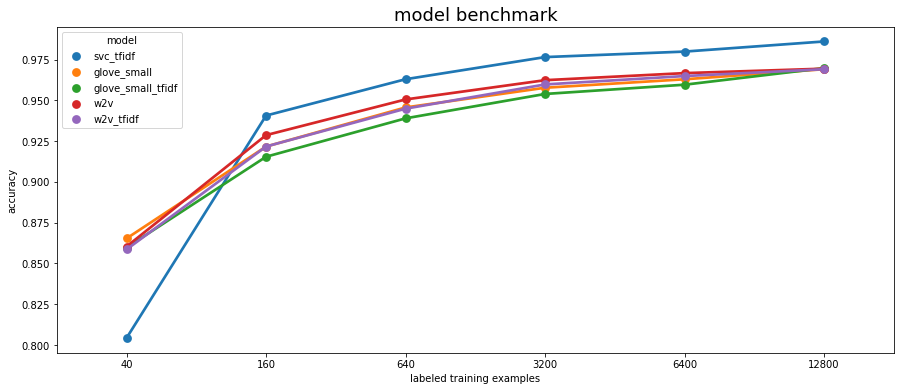

In [69]:

plt.figure(figsize=(15, 6))
fig = sns.pointplot(x='train_size', y='accuracy', hue='model', 
                    data=df[df.model.map(lambda x: x in ["svc_tfidf", "glove_small",
                                                         "glove_small_tfidf","w2v","w2v_tfidf"])])
sns.set_context("notebook", font_scale=1.5)
fig.set(ylabel="accuracy")
fig.set(xlabel="labeled training examples")
fig.set(title="model benchmark")
fig.set(ylabel="accuracy")